### Hierarchical clustering on the one-dimensional set of points:

#### 1,4,9,16,25,36,49,64,81

|First Iteration||||||||||
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|Cluster|1|4|9|16|25|36|49|64|81|
|Centroid|1|4|9|16|25|36|49|64|81|
|Distance|-|3|5|7|9|11|13|15|17|

The pair of points with the lowest distance between them is clustered together (1 and 4).

|Second Iteration|||||||||
|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|Cluster|1,4|9|16|25|36|49|64|81|
|Centroid|2.5|9|16|25|36|49|64|81|
|Distance|-|6.5|7|9|11|13|15|17|

Points 1,4 and 9 are the least distance apart, so they are clustered together.

|Third Iteration||||||||
|:--|:--|:--|:--|:--|:--|:--|:--|
|Cluster|1,4,9|16|25|36|49|64|81|
|Centroid|4.67|16|25|36|49|64|81|
|Distance|-|11.33|9|11|13|15|17|

Points 16 and 25 are the least distance apart, so they are clustered together.

|Fourth Iteration|||||||
|:--|:--|:--|:--|:--|:--|:--|
|Cluster|1,4,9|16,25|36|49|64|81|
|Centroid|4.67|20.5|36|49|64|81|
|Distance|-|15.83|15.5|13|15|17|

Points 36 and 49 are the least distance apart, so they are clustered together.

|Fifth Iteration||||||
|:--|:--|:--|:--|:--|:--|
|Cluster|1,4,9|16,25|36,49|64|81|
|Centroid|4.67|20.5|42.5|64|81|
|Distance|-|15.83|22|21.5|17|

Points 1,4,9 and 16,25 are the least distance apart, so they are clustered together.

|Sixth Iteration|||||
|:--|:--|:--|:--|:--|
|Cluster|1,4,9,16,25|36,49|64|81|
|Centroid|11|42.5|64|81|
|Distance|-|31.5|21.5|17|

Points 64 and 81 are the least distance apart, so they are clustered together.

|Seventh Iteration|||||
|:--|:--|:--|:--|:--|
|Cluster|1,4,9,16,25|36,49|64,81|
|Centroid|11|42.5|72.5|
|Distance|-|31.5|30|

Points 36,49 and 64,81 are the least distance apart, so they are clustered together.

|Eighth Iteration||||
|:--|:--|:--|:--|
|Cluster|1,4,9,16,25|36,49,64,81|
|Centroid|11|57.5|
|Distance|-|46.5|

There are only 2 clusters remaining, so they are combined

|Final Iteration||||
|:--|:--|:--|:--|
|Cluster|1,4,9,16,25,36,49,64,81|
|Centroid|31.67|
|Distance|-|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.datasets import load_iris

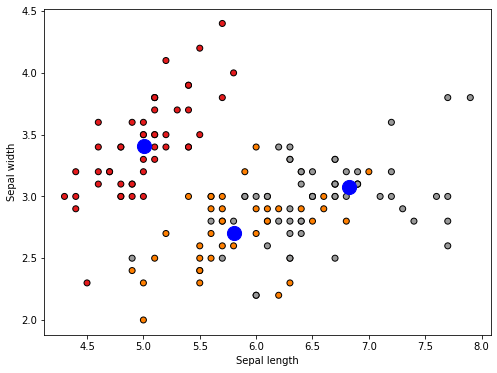

In [2]:
# dataset from sklearn
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# number of clusters
clusters = 3
row,col = X.shape

# randomly generate starting point for each centroid
centroids = np.random.randn(clusters,col) + np.average(X,axis=0)

previous_centroid = np.zeros(centroids.shape)
new_centroid = deepcopy(centroids) 

#Define cluster matrix to assign datapoints to the centroid that is closest.
cluster_mat = np.zeros(row)
distances = np.zeros((row,clusters))

# While the difference between the new and old centroid is not zero (ie it's still moving at each iteration)
difference = np.linalg.norm(new_centroid - previous_centroid)
# The new average is calculated to be the next centroid
while difference != 0:
    for n in range(clusters):
        distances[:,n] = np.linalg.norm(X - new_centroid[n], axis=1)

    cluster_mat = np.argmin(distances, axis = 1)
    previous_centroid = deepcopy(new_centroid)

    for n in range(clusters):
        new_centroid[n] = np.mean(X[cluster_mat == n], axis=0)
    difference = np.linalg.norm(new_centroid - previous_centroid)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.scatter(new_centroid[:, 0], new_centroid[:, 1], color = 'blue', s = 200)

From the website where the dataset was retrieved, it is mentioned that the dataset contains the petal and sepal lengths of 3 different types of irises (Setosa, Versicolour, and Virginica), thus it made sense that there would be 3 clusters, for each different species to cluster around.